# Importações

In [9]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Funções auxiliares

In [7]:
def show_image(image, title, figsize=(8, 8)):
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Leitura da imagem

Shape: (1500, 1200, 3)


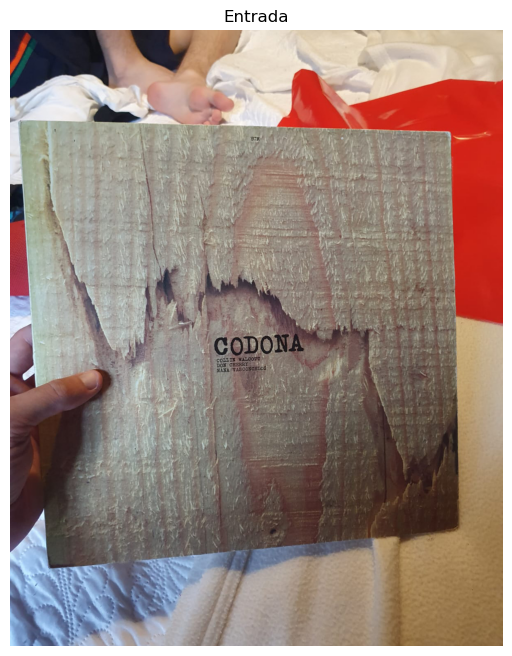

In [17]:
image_path = "images/codona.jpg"

image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

print(f"Shape: {image_rgb.shape}")
y_size, x_size, _ = image_rgb.shape

show_image(image_rgb, "Entrada")

# Definindo keypoints

#### Descritor BRIEF que será utilizado

In [18]:
orb_descriptor = cv2.ORB_create()

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

## Amostragem aleatória

In [19]:
random_kps = []
for i in range(300):
    keypoint = cv2.KeyPoint()
    keypoint.pt = (random.randint(0, x_size), random.randint(0, y_size))
    keypoint.size = 40
    random_kps.append(keypoint)

### Descrevendo keypoints

In [20]:
descriptors_random_kps = orb_descriptor.compute(image_gray, random_kps)

print(f"{len(random_kps)} keypoints definidos")
print(f"Tamanho do código definido: {len(descriptors_random_kps[1][0])}")
print(f"Código para o primeiro keypoint: {descriptors_random_kps[1][0]}")

300 keypoints definidos
Tamanho do código definido: 32
Código para o primeiro keypoint: [ 28   9 230 115 199  54 252 215  97  19 126   2   9  43  21 105  41 198
  21 138 156 240  21 224 119 207 214 129 167 215 240 130]


### Visualizando keypoints

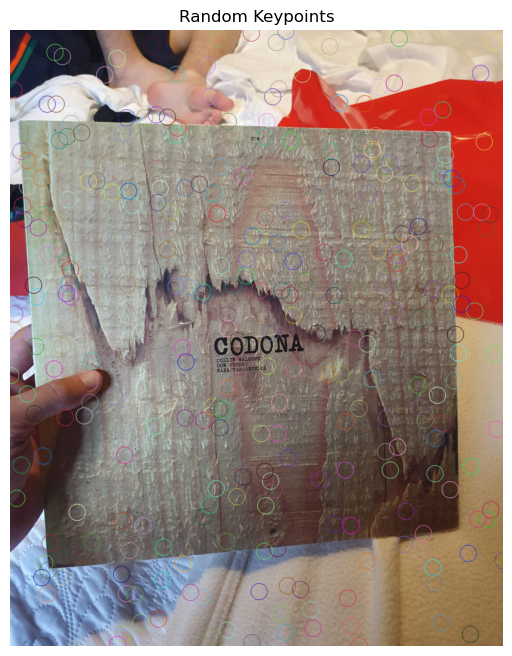

In [21]:
random_kps_img = cv2.drawKeypoints(image_rgb, random_kps, np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_image(random_kps_img, "Random Keypoints")

## Grid 15x15

In [ ]:
x_grid = x_size // 15
y_grid = y_size // 15

print(f"Grid: {x_grid} x {y_grid}")

grid_kps = []
for i in range(0, x_size, x_grid):
    for j in range(0, y_size, y_grid):
        keypoint = cv2.KeyPoint()
        keypoint.pt = (i + x_grid // 2, j + y_grid // 2)
        keypoint.size = 40
        grid_kps.append(keypoint)

Grid: 80 x 100


### Descrevendo keypoints

In [30]:
descriptors_grid_kps = orb_descriptor.compute(image_gray, grid_kps)

print(f"{len(grid_kps)} keypoints definidos")
print(f"Tamanho do código definido: {len(descriptors_grid_kps[1][0])}")
print(f"Código para o primeiro keypoint: {descriptors_grid_kps[1][0]}")

225 keypoints definidos
Tamanho do código definido: 32
Código para o primeiro keypoint: [  6  77   0   5  17   2 166 160  24 128  66   0 196   0   5   0 144  69
   2  99  96 144   1 110  36  54  14   3   0  50   1 140]


### Visualizando keypoints

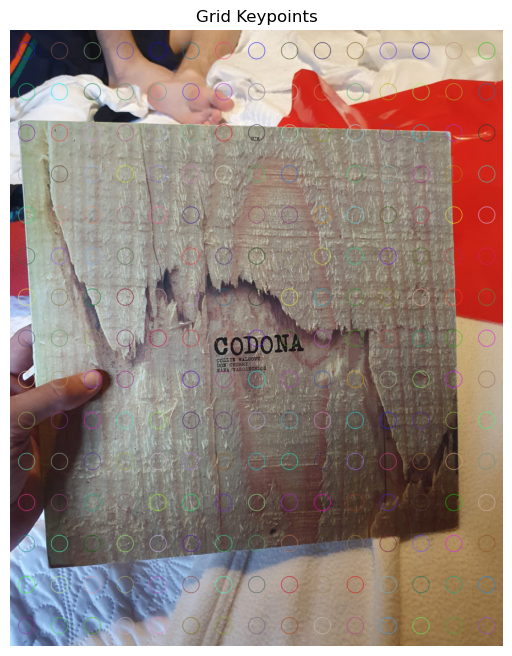

In [33]:
grid_kps_img = cv2.drawKeypoints(image_rgb, grid_kps, np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

show_image(grid_kps_img, "Grid Keypoints")

## Amostragem por detecção utilizando FAST Detector

In [34]:
orb = cv2.ORB_create()

orb_kps = orb.detect(image_gray, None)

### Descrevendo keypoints

In [35]:
descriptors_orb_kps = orb_descriptor.compute(image_gray, orb_kps)

print(f"{len(orb_kps)} keypoints definidos")
print(f"Tamanho do código definido: {len(descriptors_orb_kps[1][0])}")
print(f"Código para o primeiro keypoint: {descriptors_orb_kps[1][0]}")

500 keypoints definidos
Tamanho do código definido: 32
Código para o primeiro keypoint: [ 54 239 106 170 214 209 170 237  86  69  81 139  33 204 126   0 122 235
 131 215  86  58  44 191 124   5 141 105 245  30 222 222]


### Visualizando keypoints

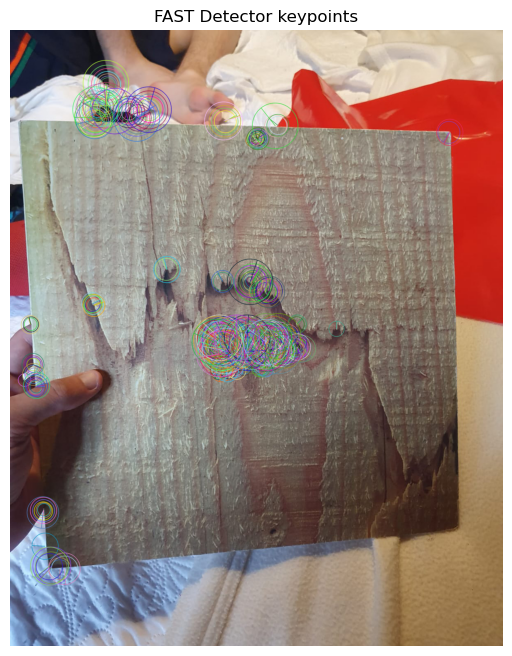

In [36]:
if(len(orb_kps) > 0):
    orb_kps_img = cv2.drawKeypoints(image_rgb, orb_kps, np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    show_image(orb_kps_img, "FAST Detector keypoints")
else:
    print("Nenhum keypoint foi detectado.")